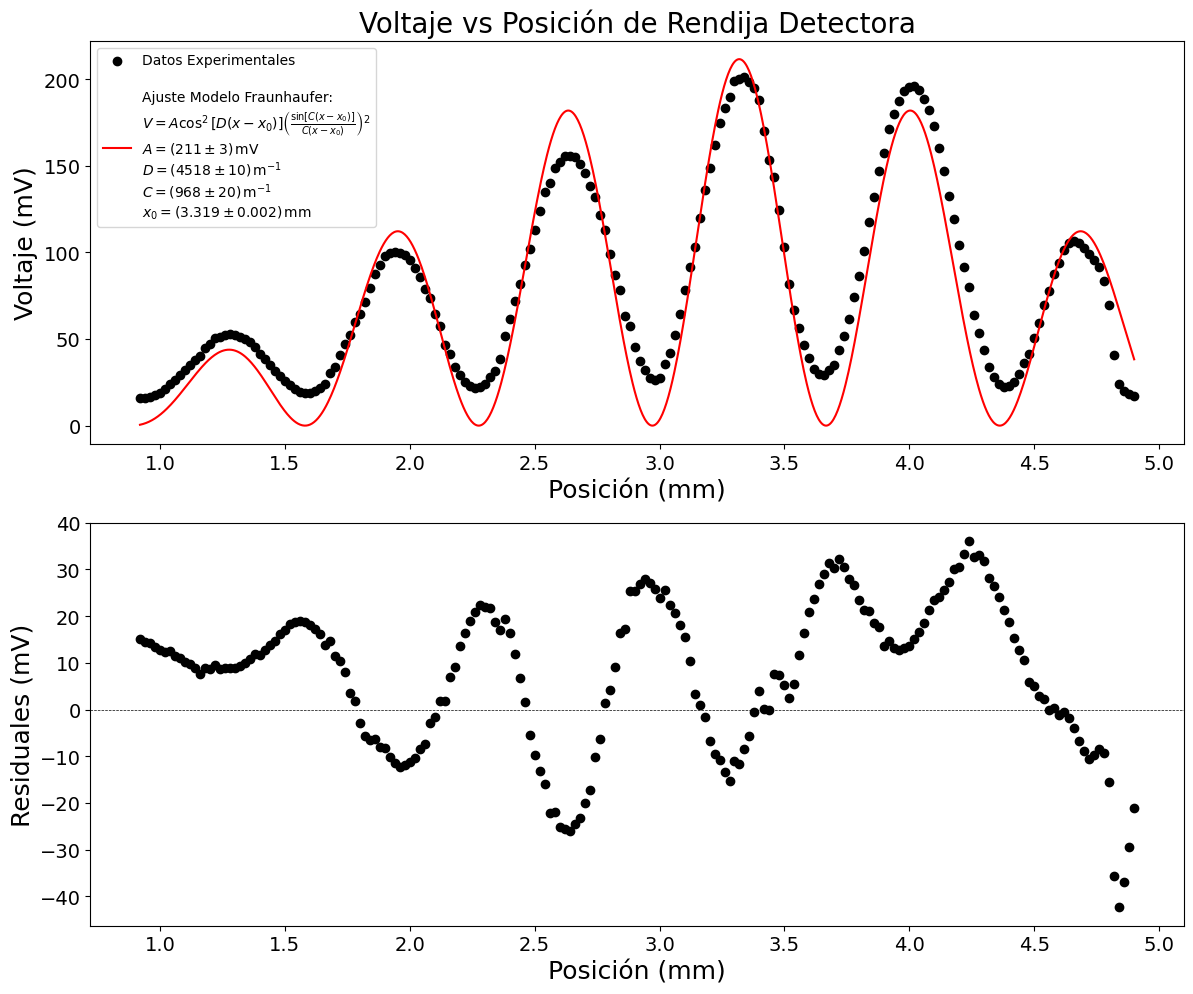

A is in volts, D and C are in 1/m because the optical     
light path is 1 m and x_0 is in m.

Best fit parameters (A, D, C, x_0): [2.11499004e-01 4.51849302e+03 9.68541519e+02 3.31896650e-03]
Standard deviations of parameters (A, D, C, x_0): [3.40758209e-03 1.45974163e+01 2.03503947e+01 2.50890356e-06]


In [18]:
from tkinter import font
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Read the CSV file with ";" as separator
# The csv has the same data as "datosOriginalesLaser.xlsx" but without the noise and with position
# in x field and voltage in y field
df = pd.read_csv('datosDepuradosLaserDobleRendija.csv', sep=';')

# Convert units
df['x'] *= 1e-6  # Position originally in um
df['y'] *= 1e-3  # Voltage originally in mV

def model_function(x, A, D, C, x_0):
    return A * (np.cos(D * (x - x_0)) ** 2) * ((np.sin(C * (x - x_0))) / (C * (x - x_0))) ** 2

def diffraction_term(x, A, D, C, x_0):
    return A * ((np.sin(C * (x - x_0))) / (C * (x - x_0))) ** 2

def interference_term(x, A, D, C, x_0):
    return A * (np.cos(D * (x - x_0)) ** 2)

# Initial parameter guesses
A_guess = 211e-3
D_guess = 4518
C_guess = 968
x_0_guess = 3.319e-3
initial_guess = [A_guess, D_guess, C_guess, x_0_guess]

# Fit the model to the data
popt, pcov = curve_fit(model_function, df['x'], df['y'], p0=initial_guess)

# Compute fitted values
y_fit = model_function(df['x'], *popt)

# Compute residuals
residuals = df['y'] - y_fit

# Generate x values for plotting
x_values = np.linspace(df['x'].min(), df['x'].max(), 1000)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot original data and best fit curve
axs[0].scatter(df['x']*1e3, df['y']*1e3, color='black', label='Datos Experimentales')
axs[0].plot(x_values*1e3, model_function(x_values, *popt)*1e3, color='red', label='\nAjuste Modelo Fraunhaufer:\n' + \
    r'$V = A \cos^2[D (x - x_0)] \left(\frac{\sin[C (x - x_0)]}{C (x - x_0)}\right)^2$' + \
    '\n' + \
    r'$A = (211 \pm 3) \, \text{mV}$' + '\n' + \
    r'$D = (4518 \pm 10) \, \text{m}^{-1}$' + '\n' + \
    r'$C = (968 \pm 20) \, \text{m}^{-1}$' + '\n' + \
    r'$x_0 = (3.319 \pm 0.002) \, \text{mm}$')
# axs[0].plot(x_values, diffraction_term(x_values, *popt), color='purple', label='Diffraction Term')
# axs[0].plot(x_values, interference_term(x_values, *popt), color='orange', label='Interference Term')
axs[0].set_xlabel('Posición (mm)', fontsize=18)
axs[0].set_ylabel('Voltaje (mV)', fontsize=18)
axs[0].set_title('Voltaje vs Posición de Rendija Detectora', fontsize=20)
axs[0].legend(fontsize=10)
axs[0].tick_params(axis='both', which='major', labelsize=14)

# Plot residuals
axs[1].scatter(df['x']*1e3, residuals*1e3, label='residuales', color='black')
axs[1].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
axs[1].set_xlabel('Posición (mm)', fontsize=18)
axs[1].set_ylabel('Residuales (mV)', fontsize=18)
# axs[1].set_title('Residuales')

# Adjust layout
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()

# Print the best fit parameters and their standard deviations
print("A is in volts, D and C are in 1/m because the optical \
    \nlight path is 1 m and x_0 is in m.\n")
print("Best fit parameters (A, D, C, x_0):", popt)
print("Standard deviations of parameters (A, D, C, x_0):", np.sqrt(np.diag(pcov)))


In [4]:
a = 0.1e-3
wavelegth = a*np.pi/968
sigma_wavelegth = (a*np.pi/(968**2))*20
d = wavelegth*4518/np.pi
sigma_d = np.sqrt((sigma_wavelegth*4518/np.pi)**2+(10*324e-9/np.pi)**2)
A = 0.211
sigma_A = 0.003
x_0 = 0.003319
sigma_x_0 = 0.000002

print("A = (211 \pm 3) mV, D = (4518 \pm 10) m^-1, C = (968 \pm 20) m^-1, x_0 = (3.319 \pm 0.002) mm")
print("wavelegth:", int(wavelegth*1e9), "nm")
print("sigma_wavelegth:", int(round(sigma_wavelegth*1e9,0)), "nm")
print("d:", round(d*1e3,2), "mm")
print("sigma_d:", round(sigma_d*1e3,3), "mm")

A = (211 \pm 3) mV, D = (4518 \pm 10) m^-1, C = (968 \pm 20) m^-1, x_0 = (3.319 \pm 0.002) mm
wavelegth: 324 nm
sigma_wavelegth: 7 nm
d: 0.47 mm
sigma_d: 0.01 mm


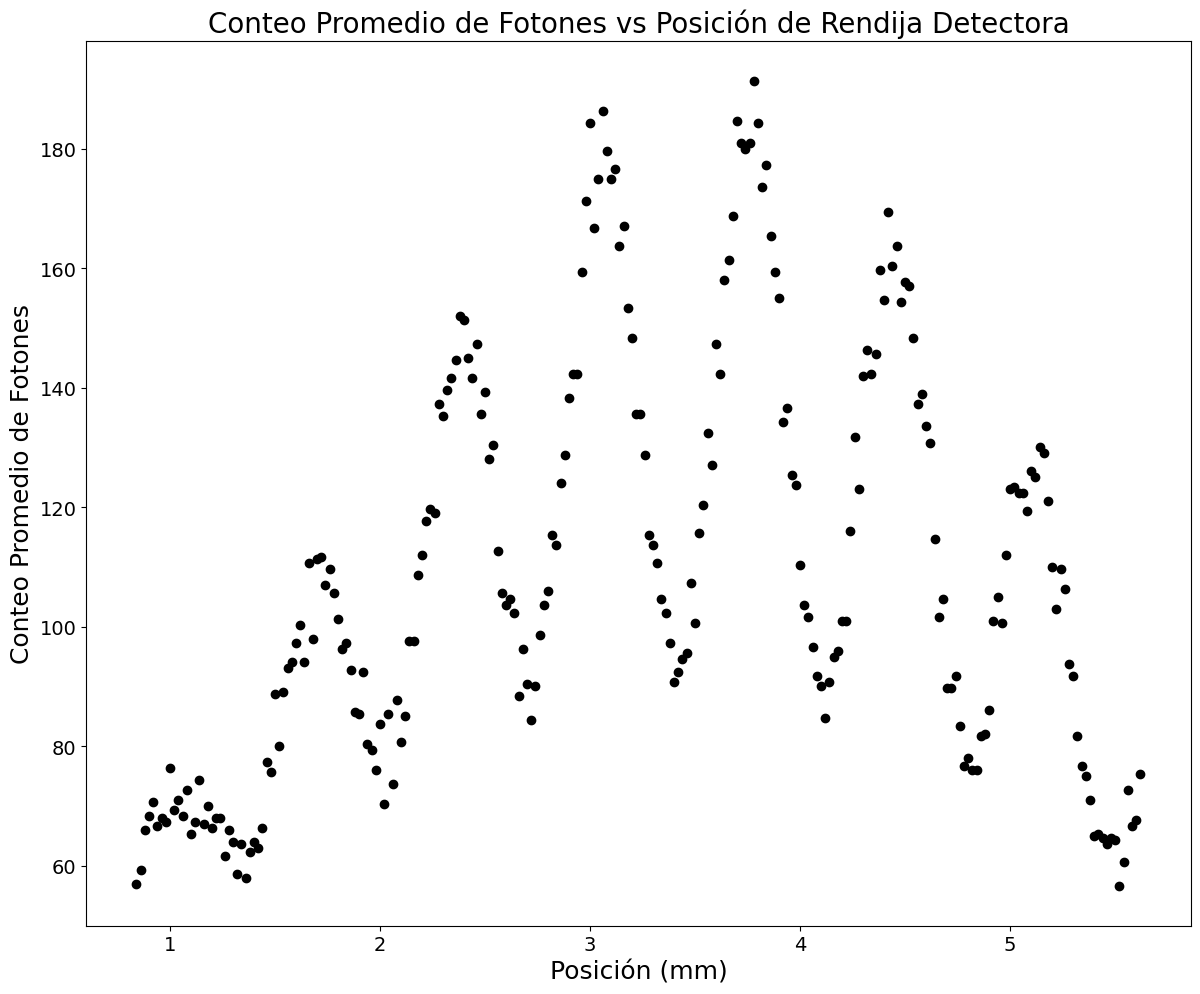

In [19]:
from tkinter import font
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Read the CSV file with ";" as separator
# The csv has the same data as "datosOriginalesLaser.xlsx" but without the noise and with position
# in x field and voltage in y field
df = pd.read_csv('datosDepuradosBombilloDobleRendija.csv', sep=';')

# Convert units
df['x'] *= 1e-6  # Position originally in um

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(12, 10))

# Plot original data and best fit curve
axs.scatter(df['x']*1e3, df['y'], color='black')
axs.set_xlabel('Posición (mm)', fontsize=18)
axs.set_ylabel('Conteo Promedio de Fotones', fontsize=18)
axs.set_title('Conteo Promedio de Fotones vs Posición de Rendija Detectora', fontsize=20)

# Adjust layout
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()